# Initialization & Dataset Generation
* NumPy helps with: Mathematical operations, matrices, generating random numbers, normalizing data.\

* matplotlib.pyplot as plt: plot the data, visualize clusters, draw decision
boundaries.\

* np.random.seed(0) :To ensure random numbers are the same every time you run the code.\

* make_blobs is a helper function to create artificial datasets for:
clustering,
classification,
neural networks.\








In [66]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)
X = X / np.max(X, axis=0)   #divide each column by its own maximum value.(Normalized)

print(f'Input:  {X}')
print(f'Output: {Y}')

Input:  [[-0.05932866  0.81609811]
 [-0.08390573  0.30195749]
 [ 0.23765883  0.18391198]
 ...
 [-0.0857306   0.26737419]
 [-0.15115017  0.64293137]
 [ 0.88139028 -0.35666475]]
Output: [3 2 1 1 0 0 4 0 0 1 4 3 1 0 0 0 4 1 0 0 4 4 2 1 2 3 2 3 4 4 0 4 4 1 4 4 1
 3 4 4 1 2 3 1 0 2 0 2 0 3 1 0 3 0 0 4 0 4 0 1 0 4 4 0 0 3 3 1 2 4 2 0 4 2
 1 4 4 1 1 1 3 2 4 2 1 0 3 4 4 0 0 2 3 1 0 0 3 2 2 2 3 2 2 4 2 0 0 4 2 0 0
 0 2 0 1 0 4 2 4 0 0 2 3 3 2 0 1 1 3 4 1 3 1 4 3 0 1 0 0 0 1 4 4 4 2 1 2 0
 3 3 1 0 1 4 1 0 1 0 1 4 3 0 2 3 1 1 0 0 0 0 2 3 4 0 1 4 2 2 1 4 4 1 3 3 0
 3 0 1 0 3 3 3 2 1 3 4 0 4 2 3 2 4 4 1 4 2 3 4 0 3 3 1 4 3 0 3 0 4 3 0 2 2
 1 1 4 1 4 1 0 1 3 4 0 0 3 1 4 4 0 1 0 0 2 4 4 3 1 2 2 0 2 2 1 1 4 4 1 3 0
 1 4 4 0 2 0 1 4 0 2 4 2 0 2 4 4 2 0 4 1 4 4 3 1 1 1 3 3 4 0 4 2 4 0 3 2 2
 3 0 4 3 4 1 1 0 3 1 2 4 1 4 3 1 0 2 0 0 0 4 1 4 0 3 4 0 2 0 4 1 4 4 0 2 2
 3 2 2 1 3 3 2 3 4 0 3 0 4 0 3 1 3 1 3 2 3 1 1 1 4 1 0 4 2 4 4 0 0 0 1 2 4
 2 4 4 3 0 4 1 2 1 2 1 4 1 4 3 4 0 4 2 2 1 4 3 2 3 4 3 1 4 2 3 4 1

# TRAIN/TEST SPLIT
test_size=0.2 Means:
* 20% of dataset → Test
* 80% of dataset → Train

random_state=42
* This ensures the split is always the same every time.

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape[0])
print("Test size :", X_test.shape[0])


Train size: 800
Test size : 200


In [70]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 15
        hiddenLayer2Neurons = 10
        hiddenLayer3Neurons = 5
        outLayerNeurons = 5

        self.learning_rate = 0.0001
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_HI2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_HI3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_OH = np.random.randn(hiddenLayer3Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI1)
        self.hiddenLayer1_output = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hiddenLayer1_output, self.W_HI2)
        self.hiddenLayer2_output = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(self.hiddenLayer2_output, self.W_HI3)
        self.hiddenLayer3_output = self.sigmoid(hidden_input3)

        output_input = np.dot(self.hiddenLayer3_output, self.W_OH)
        pred = self.sigmoid(output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid( self.hiddenLayer3_output, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_HI3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hiddenLayer2_output, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_HI2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hiddenLayer1_output, der=True)


        self.W_HI1 += X.T.dot(hidden_delta1)
        self.W_HI2 += self.hiddenLayer1_output.T.dot(hidden_delta2)
        self.W_HI3 += self.hiddenLayer2_output.T.dot(hidden_delta3)
        self.W_OH += self.hiddenLayer3_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)


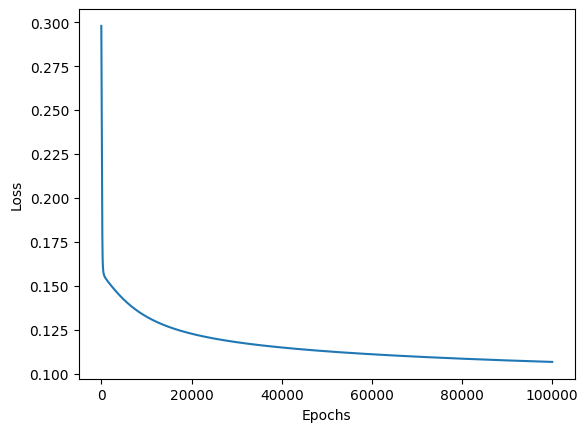

In [71]:
NN = NeuralNetwork()
Y_train_onehot = np.zeros((Y_train.shape[0], 5))
Y_train_onehot[np.arange(Y_train.shape[0]), Y_train.flatten()] = 1

epochs = 100000
err = []
for i in range(epochs):
    NN.train(X_train, Y_train_onehot)
    err.append(np.mean(np.square(Y_train_onehot - NN.feedForward(X_train))))

plt.plot(err)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_proba = NN.feedForward(X_test)
y_pred_test = np.argmax(y_pred_proba, axis=1)

print("First 10 predictions:", y_pred_test[:10])
print("First 10 true labels:", Y_test[:10])
# Define the accuracy function
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Calculate and print the accuracy
acc = accuracy_score(Y_test, y_pred_test)
print(f"Test Accuracy: {acc:.3f}")

print("\nClassification Report:\n", classification_report(Y_test, y_pred_test))

First 10 predictions: [3 2 4 2 3 1 4 3 1 1]
First 10 true labels: [3 2 4 0 2 1 4 3 1 1]
Test Accuracy: 0.760

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.41      0.56        34
           1       0.95      0.80      0.87        45
           2       0.61      0.50      0.55        38
           3       0.64      1.00      0.78        42
           4       0.84      1.00      0.91        41

    accuracy                           0.76       200
   macro avg       0.78      0.74      0.73       200
weighted avg       0.78      0.76      0.75       200



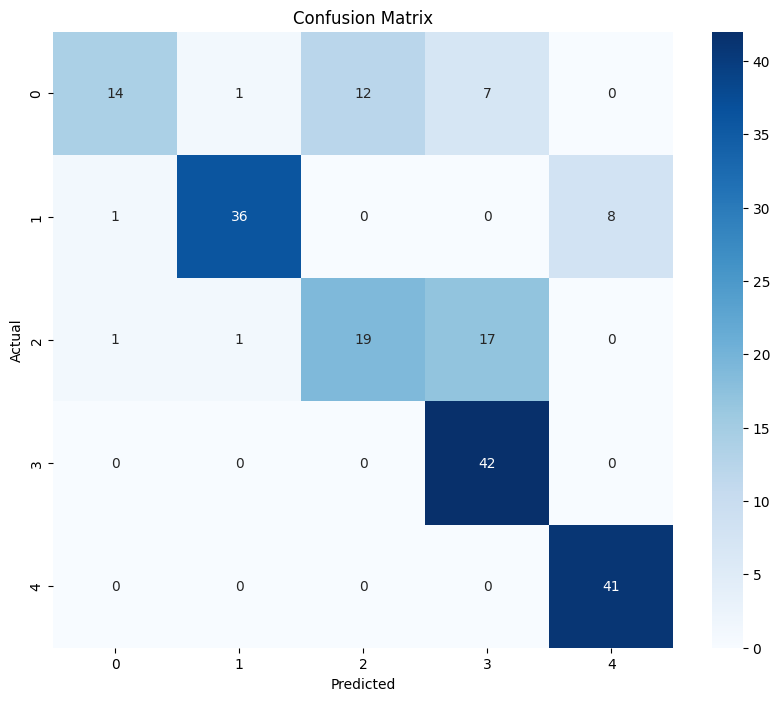

In [73]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()